<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Ago18-19/Tarea_2_MCL_BRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea_02 Machine Learning UG / Alma
>  **Barush Michelle Rueda Muñoz**

>Contenido: Uso de la regreión lineal por minimos cuadrados con el método matricial

# **Regresión lineal por mínimos cuadrados/Método matricial**
Primeramente se realizara un cambio en la notación:\
La función error se denota como función costo o función perdida y se denota por **L**\
La variable independiente se conoce como predictor y se sigue denotando con **x**\
La varaiable dependiente se le puede llamar  objetivo y se denota por **t**
La pendiente y la ordenada al origen se conocen como pesos y se denotan por **m=$w_1$** y **b=$w_0$**\
Ya con el cambio denotación ahora es importante recalcar que la variable independiente t puede depender de más de una predictor esto es muy común en sistema reales donde la evolución depende de más de un factor, con esto claro el modelo o predicción quedaría de la siguiente manera \
**$t=w_0+w_1x+w_2s_1+w_3s_3⋯w_ns_{k}$**\
Como se puede apreciar con cada nueva variable predictora se tiene que asociar un peso, esto nos dejara con n ecuación para obtener el valor de cada peso, resolverlo de la forma convencional puede ser complicado y demorar más de lo necesario, para resolver este tipo de problemas es más conveniente adoptar un cambio en la metodología.\
Se aplicara un tratamiento matricial agrupando  los datos en vectores es de decir se agruparan en un vector t todos los datos obtenidos, en un vector w todos los pesos obtenidos y  se tendrán n vectores  de datos para cada variable predictora en conjunto con  un uno.\
$\vec{t}=\begin{pmatrix}
t_1\\  
t_2\\
⋯\\
t_n
\end{pmatrix}\quad\quad \vec{x_n}=\begin{pmatrix}
1\\
x_n\\
s_{1n}\\
⋯\\
s_{kn}
\end{pmatrix}\quad\quad\vec{w}=\begin{pmatrix}
w_0\\
w_1\\
w_{2}\\
⋯\\
w_{n}
\end{pmatrix}\quad\quad$\
Donde n es el numero de datos y k es el numero de variables predictoras adicionales a x por lo tanto es claro por ejemplo que en dos dimensiones.\
$t_n=\vec{w^T}\cdot\vec{x_n}=w_0+w_1x_n$\
Se recupera el caso incial que se estudio , de forma que es claro que ahors la función error queda de la siguiente manera\
$L=\frac{1}{N}\sum {[y_i-(\vec{w^T}\cdot\vec{x_n})]^2}$\
El tramiento matrical se desarrollo en clase por lo que en este archivo solo se resaltaran las fromulas impornates empleadas.\
Función costo: $L=\frac{1}{N}\sum {(\vec{t}-X\vec{w})^T(\vec{t}-X\vec{w})}$\
Donde X representa la siguiente matriz $X=\begin{pmatrix}
1 & x_1\\
1 & x_2\\
1 & x_3\\
⋯& ⋯\\
1&x_n\\
\end{pmatrix}$\
Y los vectores para el caso de un solo predictor son:\

$\vec{t}=\begin{pmatrix}
t_1\\  
t_2\\
⋯\\
t_n
\end{pmatrix}\quad\quad\vec{w} =\begin{pmatrix}
w_0\\  
w_2\\
\end{pmatrix}$\
Se aplica entonces una condición de derivadas vectorial
$\frac{\partial L}{\partial \vec{w}}$
Obteniendo la siguiente ecuación\
$X^TX\vec{w}=X^T\vec{t}$\
De la cual podemos despejar el vector de pesos y asi obtener el ajuste.\
$\vec{w}=(X^TX)^{-1}X^T\vec{t}$
Esta expresión sera la que se programae para obtener el ajuste deseado.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


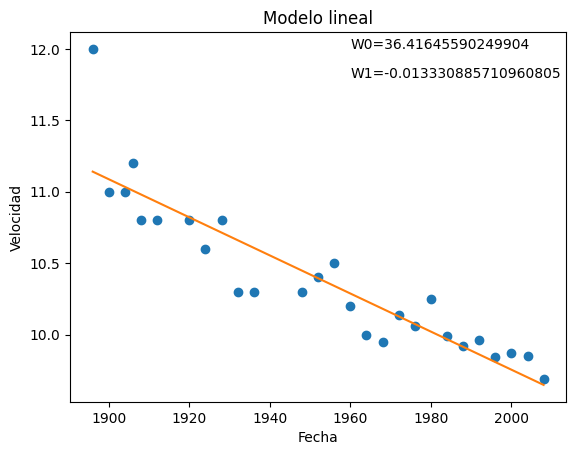

In [29]:
from numpy.linalg import linalg
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T
#Asigamos los datos
x=data[0]
t=data[1]
#Se crea la matrix de predictores
X=np.vstack([np.ones_like(x),x])
Xm=np.matmul(X,X.T) #X^T*X
Xt =np.matmul(X,t) #X^T*t
W=np.matmul(np.linalg.inv(Xm),Xt)#Se calcula W
Y=W[0]+W[1]*x
plt.plot(x,t,'o')
plt.title("Modelo lineal")
plt.xlabel("Fecha")
plt.ylabel("Velocidad")
plt.text(1960, 12, f"W0={W[0]}", fontsize=10)
plt.text(1960, 11.8, f"W1={W[1]}", fontsize=10)
plt.plot(x,Y)

#Modelo Polinomiales
En este caso la predicción toma la siguiente forma
$tn=w_0+w_1x_n+w_2x_n^2+⋯w_kx_n^k$
Este tipo de modelos añade una columna a la matriz de predictores además de agregara un peso de forma equivalente es decir un nuevo peso por cada grado polinomial adicional.
$X==\begin{pmatrix}
1 & x_1& x_1^2& ⋯& x_1^k\\
1 & x_2& x_2^2& ⋯& x_2^k\\
1 & x_3& x_3^2& ⋯& x_3^k\\
⋯& ⋯&⋯&⋯&⋯\\
1&x_n& x_n^2& ⋯& x_n^k\\
\end{pmatrix}\quad \quad \vec{w} \begin{pmatrix}w_0\\
w_1\\
⋯\\
w_k\\
\end{pmatrix}$

El procedimiento para encontrar al vector W se mantiene el añadir columnas a la matriz X y elementos al propio W  o afecta el procedimiento para encontrar la solución.


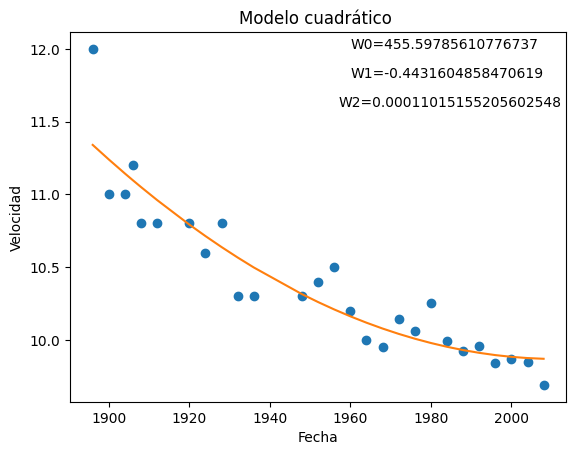

In [33]:
#Se añade a la matrix X la columna con los datos cuadraticos
X=np.vstack([np.ones_like(x),x,x**2])
Xm=np.matmul(X,X.T) #X^T*X
Xt =np.matmul(X,t) #X^T*t
W=np.matmul(np.linalg.inv(Xm),Xt)#Se calcula W
#Se hace el cambio en el modelo agregando x**2
Y=W[0]+W[1]*x+W[2]*x**2
plt.plot(x,t,'o')
plt.title("Modelo cuadrático ")
plt.text(1960, 12, f"W0={W[0]}", fontsize=10)
plt.text(1960, 11.8, f"W1={W[1]}", fontsize=10)
plt.text(1957, 11.6, f"W2={W[2]}", fontsize=10)
plt.xlabel("Fecha")
plt.ylabel("Velocidad")
plt.plot(x,Y)

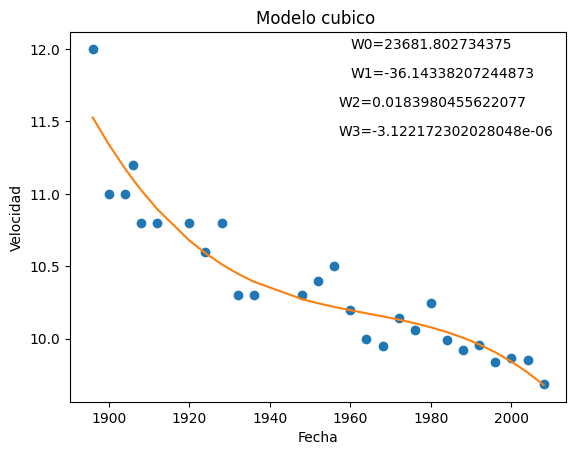

In [36]:
#Se añade a la matriz la coluna de elementos cubicos
X=np.vstack([np.ones_like(x),x,x**2,x**3])
Xm=np.matmul(X,X.T) #X^T*X
Xt =np.matmul(X,t) #X^T*t
W=np.matmul(np.linalg.inv(Xm),Xt)#Se calcula W
# Se modifica el modelo para tener el ajuste cubico
Y=W[0]+W[1]*x+W[2]*x**2+W[3]*x**3
plt.plot(x,t,'o')
plt.title("Modelo cubico ")
plt.text(1960, 12, f"W0={W[0]}", fontsize=10)
plt.text(1960, 11.8, f"W1={W[1]}", fontsize=10)
plt.text(1957, 11.6, f"W2={W[2]}", fontsize=10)
plt.text(1957, 11.4, f"W3={W[3]}", fontsize=10)
plt.xlabel("Fecha")
plt.ylabel("Velocidad")
plt.plot(x,Y)